In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_ratings.csv to user_ratings.csv


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data=pd.read_csv("user_ratings.csv")
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
movies.info()
print(" -------------------")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
 -------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


***It seems we have no missingness in our two datasets***.<br>In movies datasets, We've 9742 sample, One row for each movie. <br>In particular, ***the MovieLens 1M*** dataset is a stable benchmark dataset These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.


### ***Feature engineering***.
Let's use ***regular expressions*** to find ***the year*** that's stored between parentheses in ***user_ratings*** and ***movies*** datasets.<br>We specify the parantheses to avoid conflict with movies that have years in their titles

In [ ]:
data['year'] = data.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)

---

## ***Data cleaning***.

Remove the parentheses in ***the year columns*** that we have just created.

In [ ]:
data['year'] = data.year.str.extract('(\d\d\d\d)',expand=False)
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)

Now, Let's Remove ***the years*** from the ***title column***.

In [ ]:
data['title'] = data.title.str.replace('(\(\d\d\d\d\))', '')
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')

Applying the strip function to get rid of any ending whitespace characters that may have appeared


In [ ]:
data['title'] = data['title'].apply(lambda x: x.strip())
movies['title'] = movies['title'].apply(lambda x: x.strip())

Every row in the **user_ratings** dataframe has a **user id** associated with at **one movie** and a **rating**.<br> The timestamp showing when they reviewed it. We won’t be needing the timestamp column, ***so let’s drop it to save memory***.

In [ ]:
data.drop(columns="timestamp", axis=1, inplace=True)

Let's see **the new form of ourdataset**.

In [ ]:
data.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [ ]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [ ]:
copy = movies.copy()
copy['genres']= copy.genres.str.split('|')

In [ ]:
genre_labels = set()
for i in copy['genres'].values:
    genre_labels = genre_labels.union(set(i))

In [ ]:
# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, col, census):
    keyword_count = dict()
    for i in census: 
        keyword_count[i] = 0
    for census_keywords in dataset[col]:               
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords by frequency
    occurences = []
    for k,v in keyword_count.items():
        occurences.append([k,v])
    occurences.sort(key = lambda x:x[1], reverse = True)
    return occurences, keyword_count

In [ ]:
# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum= count_word(copy, 'genres', genre_labels)

In [ ]:
occurences = pd.DataFrame(keyword_occurences, columns=["genres", "count"])
occurences.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
genres,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Horror,Fantasy,Children,Animation,Mystery,Documentary,War,Musical,Western,IMAX,Film-Noir,(no genres listed)
count,4361,3756,1894,1828,1596,1263,1199,980,978,779,664,611,573,440,382,334,167,158,87,34


For better intuition let's visualize it.

In [ ]:
sns.set(font_scale=1.5, rc= {'figure.figsize':(10, 7)})
sns.set_style("ticks")

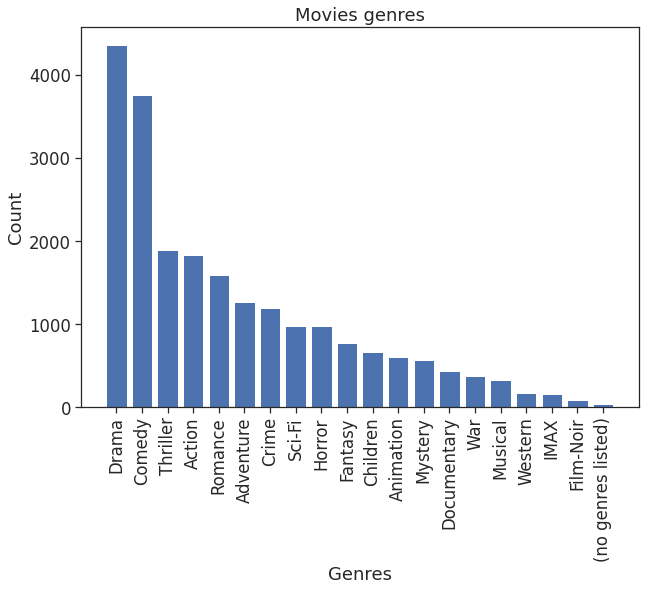

In [ ]:
plt.bar(data=occurences, x="genres", height="count")
plt.title("Movies genres")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
for s in keyword_occurences:
    genres[s[0]] = s[1]

In [ ]:
# Create the wordcloud
genre_wordcloud = WordCloud(height= 500, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

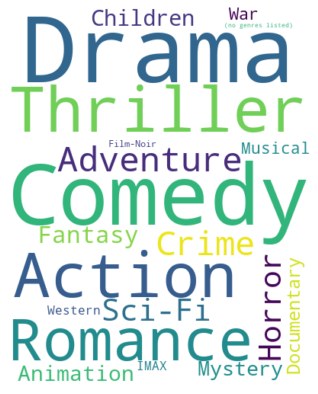

In [ ]:
# Plot the wordcloud
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

As we can observe, there is a little number of genres of movies is ***not listed***, this is obviously is ***data-entry error***, it could skew our analysis, and we've to deal with it.

In [ ]:
data["genres"] = data["genres"].astype("str")
data.loc[data.genres.str.contains('no genres listed'),'genres']= np.nan

In [ ]:
movies["genres"] = movies["genres"].astype("string")
movies.loc[movies.genres.str.contains('no genres listed'),'genres']= np.nan

Let's check for missingness.

In [ ]:
data.isna().sum()

userId      0
movieId     0
rating      0
title       0
genres     47
year       18
dtype: int64

In [ ]:
movies.isna().sum()

movieId     0
title       0
genres     34
year       13
dtype: int64

For better intution, Let's visualiza missingness.

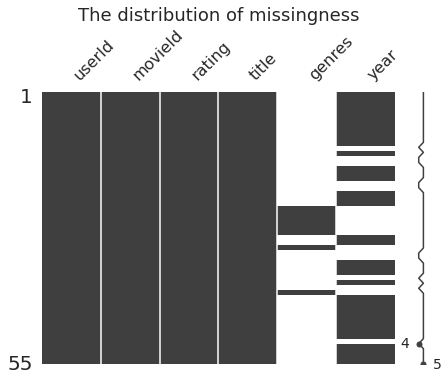

In [ ]:
missingness = data[data["genres"].isna() | data["year"].isna()]
msno.matrix(missingness, figsize=(7,5))
plt.title("The distribution of missingness")
plt.show()

Let's drop missngness.

In [ ]:
data.dropna(inplace=True)

In [ ]:
movies.dropna(inplace=True)

Let’s split the values in the Genres column into a list of Genres to simplify for future use.

In [ ]:
#Every genre is separated by a | so we simply have to call the split function on |
data['genres'] = data.genres.str.split('|')
movies['genres'] = movies.genres.str.split('|')

---

#### ***Non-personalized recommendations***
One of the basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already **<u>the most popular, or trendnig**<u>.

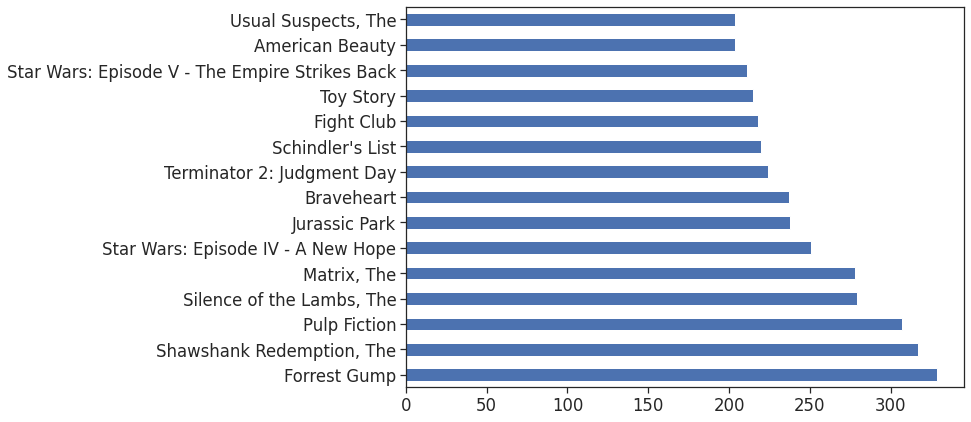

In [ ]:
data["title"].value_counts().head(15).plot(kind="barh")
plt.show()

***Forrest Gump*** is the most frequently watched movie overall, as it has been watched by ***329 viewers***, which make it a good chioce for ***Non-personalized recommendations***.<br>But just a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. <br>To understand how a viewer actually felt about a movie, more explicit data is useful. Thankfully, We have ratings from each of the viewers.

#### ***Another way for Non-personalized recommendations is to get <u> the highest rated movies***</u>.<br> but first let's get a better intuition about ratings.

In [ ]:
def percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y+50 ), ha= "center", size= 18)
    plt.show()

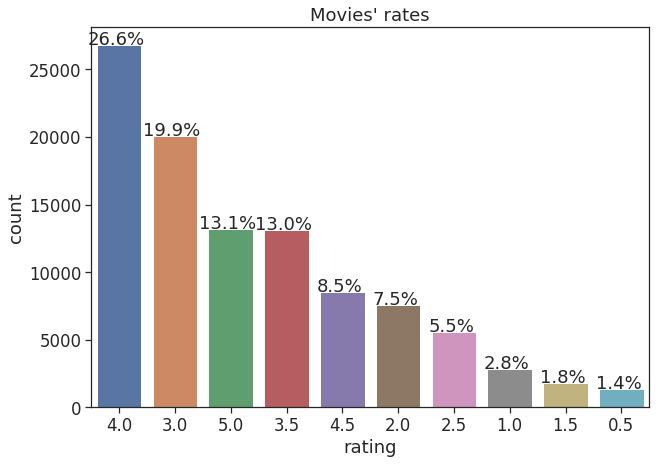

In [ ]:
ax= sns.countplot(data=data, x="rating", 
              order=data["rating"].value_counts().index)
plt.title("Movies' rates")
percentage(ax, data.rating)
plt.show()

In [ ]:
# Find the mean of the ratings given to each title
ratings = data[["title", "rating"]].groupby('title').mean()
# Order the entries by highest average rating to lowest
sorted_ratings = ratings.sort_values(by="rating", ascending=False)
sorted_ratings.head()

,rating
title,
George Carlin: Life Is Worth Losing,5.0
Red Sorghum (Hong gao liang),5.0
Madame Sousatzka,5.0
Two Family House,5.0
Return to Treasure Island,5.0


Despite being a ***real-world dataset***, you might be surprised that the highest-ranked movies are not movies that most people have heard of. <br>As we can observe the top values do indeed have very high ratings, but the movies may look very unfamiliar.

Items with very low numbers of ratings or ***very infrequently-viewed movies*** can skew the results. <br> A movie with only one rating has a solid chance of its only rating being **5 stars** pushing it to the top, while a movie that has been reviewed ***hundreds of times*** is likely to have at ***least one non-perfect review***.

***Let's test our hypothesis by seeing how many times the highest-ranked books have been reviewed.***


In [ ]:
sorted_ratings['No.ratings'] = sorted_ratings.groupby(by='title').rating.count()
sorted_ratings.head()

,rating,No.ratings
title,,
Hollywood Chainsaw Hookers,5.0,1
"Calcium Kid, The",5.0,1
Chinese Puzzle (Casse-tête chinois),5.0,1
Raise Your Voice,5.0,1
Rain,5.0,1


As predicted, this prove our hypothesis as they each occur only once in the dataset. 

#### ***The third way for Non-personalized recommendations is <u>Combining popularity and reviews***</u>.
you have used the two most common non-personalized recommendation methods to find movies to suggest. As you may have noticed, they both have their ***weaknesses***. <br>Finding the most frequently watched movies will show you what has been watched, but not how people **explicitly feel about it**. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences are skewing the data.

In [ ]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = data["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  data[data["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()

popular_movies_average_rankings.sort_values(by="rating", ascending=False).head()

,rating
title,
"Shawshank Redemption, The",4.429022
"Godfather, The",4.289062
Fight Club,4.272936
Cool Hand Luke,4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,4.268041


W're now able to make ***intelligent non-personalized recommendations*** that combine ***both the ratings of an item and how frequently*** it has been interacted with.

#### ***The fourth way for Non-personalized recommendations is Finding all pairs of movies***.

We will work through how to find all pairs of movies or all permutations of pairs of movies that have been watched by the same person.

In [ ]:
from itertools import permutations
# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),columns=['movie_a', 'movie_b'])
  return pairs
# Apply the function to the title column and reset the index
movie_combinations = data.groupby('userId')['title'].apply(find_movie_pairs).reset_index(drop=True)

movie_combinations.head()

,movie_a,movie_b
0,Toy Story,Grumpier Old Men
1,Toy Story,Heat
2,Toy Story,Seven (a.k.a. Se7en)
3,Toy Story,"Usual Suspects, The"
4,Toy Story,From Dusk Till Dawn


In [ ]:
movie_combinations.shape

(60793300, 2)

Now, We've a clean table of all of the movies that were watched by the same user, which can be used to find the most commonly paired movies.<br>***Counting up the pairs***.<br>You can now create DataFrame of all the permutations of movies that have been watched by the same user. This is of limited use unless you can find which movies are most commonly paired. 

In [ ]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
combination_counts_df.sort_values(by="size", ascending=False, inplace= True)
combination_counts_df.head()

,movie_a,movie_b,size
8296488,Forrest Gump,"Shawshank Redemption, The",231
20004286,"Shawshank Redemption, The",Forrest Gump,231
17967569,Pulp Fiction,Forrest Gump,230
8295794,Forrest Gump,Pulp Fiction,230
17971526,Pulp Fiction,"Shawshank Redemption, The",222


Now, We've found **the most commonly paired movies** , which can be used to find the most commonly paired movies to make our ***first recommendations***.

This means that it would be a good movie to recommend a specific movies for  watchers as it shows they have similar fans.

While you are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people.

In [ ]:
# avoid dublications
combination_counts_df.drop_duplicates(subset=["size"], keep="first").head()

,movie_a,movie_b,size
19956995,"Shawshank Redemption, The",Forrest Gump,231
17924901,Pulp Fiction,Forrest Gump,230
19960107,"Shawshank Redemption, The",Pulp Fiction,222
20212646,"Silence of the Lambs, The",Pulp Fiction,207
20209360,"Silence of the Lambs, The",Forrest Gump,199


Let's find movies that different users have watched beside ***Forrest Gump*** movie, So we can recommend those movies for other users in the future if they will watch Forrest Gump movie.

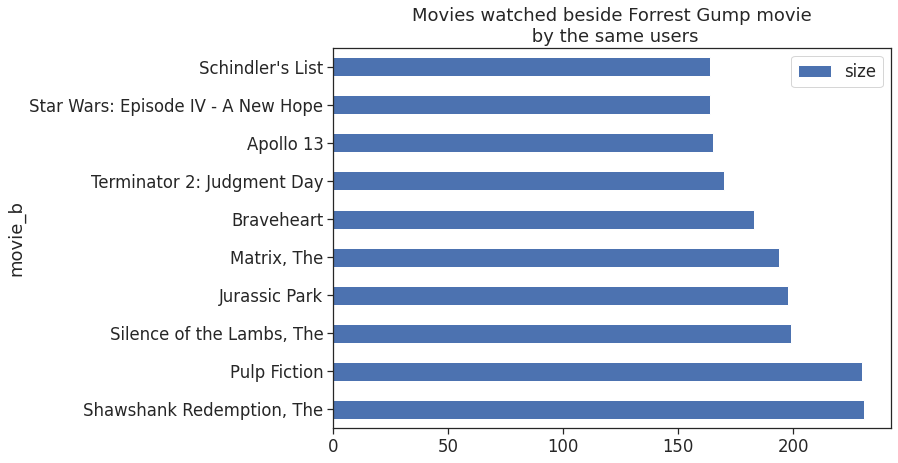

In [ ]:
combination_counts_df[combination_counts_df["movie_a"]== "Forrest Gump"].head(10).plot.barh("movie_b")
plt.title("Movies watched beside Forrest Gump movie\n by the same users")
plt.show()

---

## <u>***Content-based recomendations***</u>.
Content-based recommendation system tries to recommend items to users based on ***their profile*** and the ***content or features of item***. <br>***The user's profile*** revolves around that ***user's preferences and tastes***. It is shaped based on user ***ratings***, including the number of times that user has clicked on different items or perhaps even liked those items.<br> ***content*** is like the items category, tag, genre…etc. 

## <u>**Content-based similarities**</u>.

In [ ]:
movies_Genres = movies[["title", "genres"]].copy()
#For every row in the dataframe, iterate through the list of genres and place a1 into the corresponding column
for index, row in movies[["title", "genres"]].iterrows():
    for genre in row['genres']:
        movies_Genres.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
movies_Genres = movies_Genres.fillna(0)
#drop the genres column
movies_Genres.drop("genres", axis=1, inplace=True)
movies_Genres.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir
0,Toy Story,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jumanji,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grumpier Old Men,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Waiting to Exhale,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Father of the Bride Part II,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This newly formatted table with a vector contained in a row per movie and a column per feature will allow you to calculate distances and similarities between movies.

Now We can begin making comparisons and recommendations, but to do so, we will need a way of <u>***calculating similarity between rows***</u>. 

The metric we will use to measure similarity between items in our newly encoded dataset is called <u>***the Jaccard similarity***</u>. 

The Jaccard similarity is <u>the ratio of attributes that two items have in common, divided by the total number of their combined attributes</u>. 

These are respectively shown by the two orange shaded areas in the Venn diagrams here. It will always be between 0 and 1.

<u>***the more attributes the two items have in common, the higher the score***</u>. 

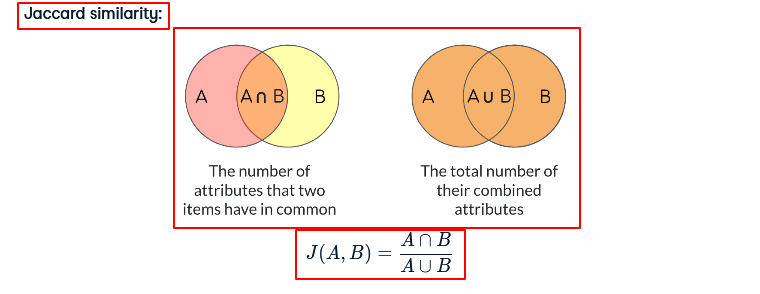

In [ ]:
movies_Genres.set_index("title", inplace=True)

In [ ]:
print(movies[movies["title"]== "GoldenEye"])
print(movies[movies["title"]== "Toy Story"])

   movieId      title                         genres  year
9       10  GoldenEye  [Action, Adventure, Thriller]  1995
   movieId      title                                             genres  year
0        1  Toy Story  [Adventure, Animation, Children, Comedy, Fantasy]  1995


In [ ]:
from sklearn.metrics import jaccard_score

# Extract just the rows containing GoldenEye and Toy Story
GoldenEye = movies_Genres.loc['GoldenEye'].values
toy_story = movies_Genres.loc['Toy Story'].values
# Find the similarity between GoldenEye and Toy Story
print(jaccard_score(GoldenEye, toy_story))

# Repeat for GoldenEye and Skyfall
skyfall = movies_Genres.loc['Skyfall'].values
print(jaccard_score(GoldenEye, skyfall))

0.14285714285714285
0.75


The more genres that two movies have in common, the more likely it is that someone who liked one will like the other, so now we're going to apply this at a larger scale instead of just one pair of movies.

In [ ]:
# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movies_Genres.values, metric='jaccard')

Note that pdist calculates the Jaccard distance which is a measure of how different rows are from each other. As we want the complement of this, the similarity, we subtract the values from 1. 

In [ ]:
# Convert the distances to a square matrix
jaccard_similarity_array = 1- squareform(jaccard_distances)
# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index= movies_Genres.index, columns= movies_Genres.index)
jaccard_similarity_df.head()

title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,"American President, The",Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island,Casino,Sense and Sensibility,Four Rooms,Ace Ventura: When Nature Calls,Money Train,Get Shorty,Copycat,Assassins,Powder,Leaving Las Vegas,Othello,Now and Then,Persuasion,"City of Lost Children, The (Cité des enfants perdus, La)",Shanghai Triad (Yao a yao yao dao waipo qiao),Dangerous Minds,Twelve Monkeys (a.k.a. 12 Monkeys),Babe,Dead Man Walking,It Takes Two,Clueless,"Cry, the Beloved Country",Richard III,Dead Presidents,Restoration,...,Sherlock - A Study in Pink,"Game Over, Man!",Blockers,Pacific Rim: Uprising,Rampage,Jurassic World: Fallen Kingdom,Incredibles 2,Deadpool 2,Solo: A Star Wars Story,Won't You Be My Neighbor?,Sorry to Bother You,Ant-Man and the Wasp,Dogman,Mamma Mia: Here We Go Again!,Tag,The Man Who Killed Don Quixote,Boundaries,Spiral,Mission: Impossible - Fallout,SuperFly,Iron Soldier,BlacKkKlansman,The Darkest Minds,Tilt,Jeff Ross Roasts the Border,John From,Liquid Truth,Bunny,Hommage à Zgougou (et salut à Sabine Mamou),Gintama,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.6,0.166667,0.142857,0.200000,0.0,0.166667,0.400000,0.0,0.142857,0.142857,0.166667,0.6,0.000000,0.142857,0.00,0.000000,0.200000,0.200000,0.111111,0.142857,0.000000,0.0,0.00,0.000000,0.000000,0.166667,0.000000,0.250000,0.00,0.000000,0.0,0.166667,0.00,0.400000,0.166667,0.000000,0.00,0.0,0.000000,...,0.0,0.166667,0.200000,0.142857,0.142857,0.111111,0.5,0.142857,0.285714,0.0,0.333333,0.428571,0.00,0.166667,0.200000,0.600000,0.166667,0.0,0.142857,0.0,0.0,0.142857,0.0,0.000000,0.200000,0.000000,0.000000,0.2,0.0,0.285714,0.285714,0.166667,0.166667,0.2,0.0,0.500000,0.600000,0.000000,0.166667,0.200000
Jumanji,0.600000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.200000,0.000000,0.000000,0.5,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.250000,0.000000,0.333333,0.00,0.000000,0.0,0.250000,0.00,0.250000,0.000000,0.000000,0.00,0.0,0.000000,...,0.0,0.000000,0.000000,0.200000,0.200000,0.142857,0.4,0.000000,0.400000,0.0,0.200000,0.333333,0.00,0.000000,0.000000,0.500000,0.000000,0.0,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.166667,0.200000,0.000000,0.000000,0.000000
Grumpier Old Men,0.166667,0.0,1.000000,0.666667,0.500000,0.0,1.000000,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.000000,0.250000,0.00,0.333333,0.500000,0.500000,0.166667,0.250000,0.000000,0.0,0.00,0.333333,0.000000,0.000000,0.333333,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.333333,1.000000,0.000000,0.00,0.0,0.000000,...,0.0,0.333333,0.500000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.0,0.250000,0.166667,0.00,1.000000,0.500000,0.250000,0.333333,0.0,0.000000,0.0,0.0,0.250000,0.0,0.333333,0.500000,0.000000,0.000000,0.0,0.0,0.200000,0.200000,0.000000,0.333333,0.0,0.0,0.200000,0.250000,0.000000,0.000000,0.500000
Waiting to Exhale,0.142857,0.0,0.666667,1.000000,0.333333,0.0,0.666667,0.000000,0.0,0.000000,1.000000,0.250000,0.0,0.333333,0.200000,0.25,0.666667,0.333333,0.333333,0.333333,0.200000,0.142857,0.0,0.25,0.666667,0.333333,0.250000,0.666667,0.142857,0.25,0.333333,0.0,0.250000,0.25,0.250000,0.666667,0.333333,0.25,0.2,0.333333,...,0.0,0.250000,0.333333,0.000000,0.000000,0.142857,0.0,0.200000,0.000000,0.0,0.200000,0.142857,0.25,0.666667,0.333333,0.200000,0.666667,0.0,0.000000,0.0,0.0,0.500000,0.0,0.666667,0.333333,0.333333,0.333333,0.0,0.0,0.166667,0.166667,0.250000,0.666667,0.0,0.0,0.166667,0.200000,0

Now, Let's create a method which takes the movie title and get all similar movies.

In [ ]:
def get_similar_movies(movie):
    jaccard_similarity_series = jaccard_similarity_df.loc[movie]
    ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)
    return ordered_similarities.head()

In [ ]:
get_similar_movies("Thor")

title
Thor                                            1.000000
Harry Potter and the Deathly Hallows: Part 2    0.833333
Harry Potter and the Order of the Phoenix       0.800000
Pirates of the Caribbean: On Stranger Tides     0.800000
Thor: The Dark World                            0.800000
Name: Thor, dtype: float64

### **<u>Text-based similarities</u>**.
You can generate content-based recommendations when descriptive attributes are available.<br> we use <u>**Term Frequency Inverse Document Frequency**</u> or ***TF-IDF*** to transform the text into something usable. <br>***TF-IDF*** <u>divides the number of times a word occurs in a document by a measure of what proportion of all the documents a word occurs in</u>. <br>This has the effect of reducing the value of common words while increasing the weight of words that do not occur in many documents.

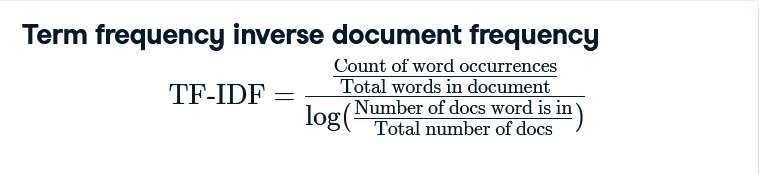

To do so, First we import TfidfVectorizer() from sklearn. <br>By default, the vectorizer generates a feature for every word in every document, which is a lot of features. Thankfully we can specify restraints on the features being generated. <br><u>***Filtering the data***</u>.
First, we set the <u>**min_df argument** =2 </u>. This limits our features to only those that have occurred in at least two documents. Useful as terms occurring once are not valuable for finding similarities.<br>We should also remove words that are too common using <u>**max_df argument**</u>. By setting this to 0.7, words that occur in more than 70% of the descriptions will be excluded.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
movies_copy = movies.copy()
movies_copy['genres'] = movies_copy['genres'].astype('str')

In [ ]:
# Instantiate the vectorizer object and transform the plot column
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)
vectorized_data = vectorizer.fit_transform(movies_copy["genres"])

# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names(), index = movies.title)

# Assign the movie titles to the index and inspect
tfidf_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,horror,imax,musical,mystery,noir,romance,sci,thriller,war,western
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,0.0,0.416799,0.516295,0.504902,0.267364,0.0,0.0,0.000000,0.483021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Jumanji,0.0,0.512285,0.000000,0.620572,0.000000,0.0,0.0,0.000000,0.593678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men,0.0,0.000000,0.000000,0.000000,0.570680,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.821172,0.0,0.0,0.0,0.0
Waiting to Exhale,0.0,0.000000,0.000000,0.000000,0.504843,0.0,0.0,0.466287,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.726436,0.0,0.0,0.0,0.0
Father of the Bride Part II,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Now, We're able to manipulate text data into DataFrames with each row representing an item, and each column represeting a word extracted from the texts. You will be able to use this in a similar way to the attribute DataFrames you generated previously to to measure similarities between items and make recommendations.

We've put in the hard work of getting your TF-IDF data into a usable format, it's time to put it to work generating finding similarities and generating recommendations.

We'll use the <u>***cosine similarity metric***</u> ; to find the similarities between items.

<u>***cosine similarity***</u>: mathematically, it's the measure of the angle between two documents in the high dimensional metric space as seen on this two-dimensional example. All values are between 0 and 1 where 1 is an exact match. 
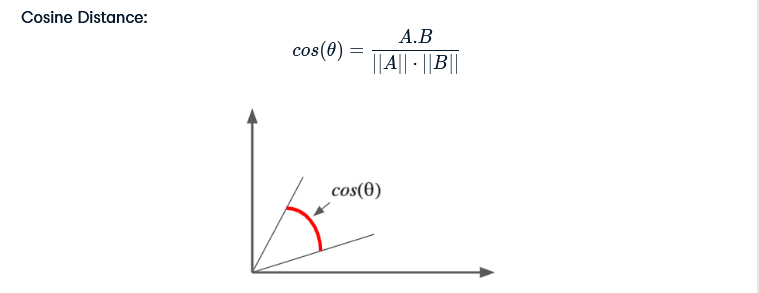

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index= tfidf_df.index, columns= tfidf_df.index)

# Print the top 5 rows of the DataFrame
cosine_similarity_df.head()

title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,"American President, The",Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island,Casino,Sense and Sensibility,Four Rooms,Ace Ventura: When Nature Calls,Money Train,Get Shorty,Copycat,Assassins,Powder,Leaving Las Vegas,Othello,Now and Then,Persuasion,"City of Lost Children, The (Cité des enfants perdus, La)",Shanghai Triad (Yao a yao yao dao waipo qiao),Dangerous Minds,Twelve Monkeys (a.k.a. 12 Monkeys),Babe,Dead Man Walking,It Takes Two,Clueless,"Cry, the Beloved Country",Richard III,Dead Presidents,Restoration,...,Sherlock - A Study in Pink,"Game Over, Man!",Blockers,Pacific Rim: Uprising,Rampage,Jurassic World: Fallen Kingdom,Incredibles 2,Deadpool 2,Solo: A Star Wars Story,Won't You Be My Neighbor?,Sorry to Bother You,Ant-Man and the Wasp,Dogman,Mamma Mia: Here We Go Again!,Tag,The Man Who Killed Don Quixote,Boundaries,Spiral,Mission: Impossible - Fallout,SuperFly,Iron Soldier,BlacKkKlansman,The Darkest Minds,Tilt,Jeff Ross Roasts the Border,John From,Liquid Truth,Bunny,Hommage à Zgougou (et salut à Sabine Mamou),Gintama,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.813607,0.152580,0.134977,0.267364,0.0,0.152580,0.654711,0.0,0.262366,0.134977,0.136153,0.833791,0.000000,0.257308,0.000000,0.000000,0.267364,0.267364,0.094116,0.115688,0.000000,0.0,0.000000,0.000000,0.000000,0.453559,0.000000,0.379217,0.000000,0.000000,0.0,0.453559,0.000000,0.571322,0.152580,0.000000,0.000000,0.000000,0.000000,...,0.0,0.157659,0.267364,0.264895,0.205282,0.182336,0.763411,0.091233,0.434984,0.0,0.360928,0.473581,0.000000,0.152580,0.267364,0.691747,0.196406,0.0,0.262366,0.0,0.0,0.127940,0.0,0.000000,0.267364,0.000000,0.000000,0.516295,0.0,0.276291,0.360260,0.465760,0.196406,0.516295,0.0,0.680256,0.755879,0.000000,0.421125,0.267364
Jumanji,0.813607,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.804702,0.0,0.322472,0.000000,0.000000,0.631870,0.000000,0.316257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.557467,0.000000,0.466094,0.000000,0.000000,0.0,0.557467,0.000000,0.548426,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.325582,0.252311,0.224108,0.578534,0.000000,0.534637,0.0,0.339573,0.495121,0.000000,0.000000,0.000000,0.723211,0.000000,0.0,0.322472,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.240589,0.000000,0.000000,0.000000,0.000000,0.0,0.341417,0.379371,0.000000,0.000000,0.000000
Grumpier Old Men,0.152580,0.000000,1.000000,0.884634,0.570680,0.0,1.000000,0.000000,0.0,0.000000,0.884634,0.290614,0.000000,0.000000,0.467929,0.000000,0.691059,0.570680,0.570680,0.200888,0.246932,0.000000,0.0,0.000000,0.691059,0.000000,0.000000,0.691059,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.267064,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.336519,0.570680,0.000000,0.000000,0.000000,0.000000,0.194735,0.000000,0.0,0.180681,0.151007,0.000000,1.000000,0.570680,0.220571,0.419223,0.0,0.000000,0.0,0.0,0.273083,0.0,0.691059,0.570680,0.000000,0.000000,0.000000,0.0,0.171923,0.162607,0.000000,0.419223,0.000000,0.0,0.181662,0.201857,0.000000,0.000000,0.570680
Waiting to Exhale,0.134977,0.000000,0.884634,1.000000,0.504843,0.0,0.884634,0.000000,0.0,0.000000,1.000000,0.257087,0.000000,0.466287,0.413946,0.234704,0.863211,0.504843,0.504843,0.329317,0.218444,0.124808,0.0,0.168082,0.863211,0.466287,0.204868,0.863211,0.107279,0.234704,0.466287,0.0,0.204868,0.234704,0.236254,0.884634,0.466287,0.182505,0.188088,0.466287,...,0.0,0.297696,0.504843,0.000000,0.000000,0.120858,0.000000,0.172269,0.000000,0.

As you can see in the table, each movie has its own row and its own column, so for example, the value in the cell where the Toy Story row meets the Thor column represents the cosine distance between them. This allows you to look up any distance of any movie pairing by filtering on the two axes.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
cosine_sim = linear_kernel(tfidf_df, tfidf_df)
cosine_sim = pd.DataFrame(cosine_sim, columns=tfidf_df.index, index= tfidf_df.index)
cosine_sim.head()

title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,"American President, The",Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island,Casino,Sense and Sensibility,Four Rooms,Ace Ventura: When Nature Calls,Money Train,Get Shorty,Copycat,Assassins,Powder,Leaving Las Vegas,Othello,Now and Then,Persuasion,"City of Lost Children, The (Cité des enfants perdus, La)",Shanghai Triad (Yao a yao yao dao waipo qiao),Dangerous Minds,Twelve Monkeys (a.k.a. 12 Monkeys),Babe,Dead Man Walking,It Takes Two,Clueless,"Cry, the Beloved Country",Richard III,Dead Presidents,Restoration,...,Sherlock - A Study in Pink,"Game Over, Man!",Blockers,Pacific Rim: Uprising,Rampage,Jurassic World: Fallen Kingdom,Incredibles 2,Deadpool 2,Solo: A Star Wars Story,Won't You Be My Neighbor?,Sorry to Bother You,Ant-Man and the Wasp,Dogman,Mamma Mia: Here We Go Again!,Tag,The Man Who Killed Don Quixote,Boundaries,Spiral,Mission: Impossible - Fallout,SuperFly,Iron Soldier,BlacKkKlansman,The Darkest Minds,Tilt,Jeff Ross Roasts the Border,John From,Liquid Truth,Bunny,Hommage à Zgougou (et salut à Sabine Mamou),Gintama,Gintama: The Movie,anohana: The Flower We Saw That Day - The Movie,Silver Spoon,Love Live! The School Idol Movie,Jon Stewart Has Left the Building,Black Butler: Book of the Atlantic,No Game No Life: Zero,Flint,Bungo Stray Dogs: Dead Apple,Andrew Dice Clay: Dice Rules
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.813607,0.152580,0.134977,0.267364,0.0,0.152580,0.654711,0.0,0.262366,0.134977,0.136153,0.833791,0.000000,0.257308,0.000000,0.000000,0.267364,0.267364,0.094116,0.115688,0.000000,0.0,0.000000,0.000000,0.000000,0.453559,0.000000,0.379217,0.000000,0.000000,0.0,0.453559,0.000000,0.571322,0.152580,0.000000,0.000000,0.000000,0.000000,...,0.0,0.157659,0.267364,0.264895,0.205282,0.182336,0.763411,0.091233,0.434984,0.0,0.360928,0.473581,0.000000,0.152580,0.267364,0.691747,0.196406,0.0,0.262366,0.0,0.0,0.127940,0.0,0.000000,0.267364,0.000000,0.000000,0.516295,0.0,0.276291,0.360260,0.465760,0.196406,0.516295,0.0,0.680256,0.755879,0.000000,0.421125,0.267364
Jumanji,0.813607,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.804702,0.0,0.322472,0.000000,0.000000,0.631870,0.000000,0.316257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.557467,0.000000,0.466094,0.000000,0.000000,0.0,0.557467,0.000000,0.548426,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.325582,0.252311,0.224108,0.578534,0.000000,0.534637,0.0,0.339573,0.495121,0.000000,0.000000,0.000000,0.723211,0.000000,0.0,0.322472,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.240589,0.000000,0.000000,0.000000,0.000000,0.0,0.341417,0.379371,0.000000,0.000000,0.000000
Grumpier Old Men,0.152580,0.000000,1.000000,0.884634,0.570680,0.0,1.000000,0.000000,0.0,0.000000,0.884634,0.290614,0.000000,0.000000,0.467929,0.000000,0.691059,0.570680,0.570680,0.200888,0.246932,0.000000,0.0,0.000000,0.691059,0.000000,0.000000,0.691059,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.267064,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.336519,0.570680,0.000000,0.000000,0.000000,0.000000,0.194735,0.000000,0.0,0.180681,0.151007,0.000000,1.000000,0.570680,0.220571,0.419223,0.0,0.000000,0.0,0.0,0.273083,0.0,0.691059,0.570680,0.000000,0.000000,0.000000,0.0,0.171923,0.162607,0.000000,0.419223,0.000000,0.0,0.181662,0.201857,0.000000,0.000000,0.570680
Waiting to Exhale,0.134977,0.000000,0.884634,1.000000,0.504843,0.0,0.884634,0.000000,0.0,0.000000,1.000000,0.257087,0.000000,0.466287,0.413946,0.234704,0.863211,0.504843,0.504843,0.329317,0.218444,0.124808,0.0,0.168082,0.863211,0.466287,0.204868,0.863211,0.107279,0.234704,0.466287,0.0,0.204868,0.234704,0.236254,0.884634,0.466287,0.182505,0.188088,0.466287,...,0.0,0.297696,0.504843,0.000000,0.000000,0.120858,0.000000,0.172269,0.000000,0.

Making recommendations with TF-IDF

In the last exercise you pre-calculated the similarity ratings between all movies in the dataset based on their plots transformed by TF-IDF. Now you will put these similarity ratings in a DataFrame for ease of use. Then you will use this new DataFrame to suggest a movie recommendation.

In [ ]:
# Wrap the preloaded array in a DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df.index, columns=tfidf_df.index)

def get_similar_movies_with_cosine_similarty(movie):
    cosine_similarity_series = cosine_similarity_df.loc[movie]
    ordered_similarities = cosine_similarity_series.sort_values(ascending=False)
    return ordered_similarities.head(10)

In [ ]:
get_similar_movies_with_cosine_similarty("Rio")

title
Rio 2                                               1.0
Peanuts Movie, The                                  1.0
Jack-Jack Attack                                    1.0
Madagascar                                          1.0
Nut Job, The                                        1.0
Minions                                             1.0
Wallace & Gromit in The Curse of the Were-Rabbit    1.0
Horton Hears a Who!                                 1.0
Despicable Me 3                                     1.0
Shaun the Sheep Movie                               1.0
Name: Rio, dtype: float64

**Peanuts Movie**, **Jack Attack**, **Madagascar**, **Minions**,......, **Despicable Me 3** and  **Shaun the Sheep** have the highest similarity value to **Rio**! <br>This means that viewers that liked Rio are likely to enjoy these movies. Since they are similar, this makes a lot of sense.

In [ ]:
# Build a 1-dimensional array with movie titles
#titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = movies[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

### <u>***User profile based recommendation***</u>.

The task of the recommender engine is to recommend one of the three candidate movies to this user, or in other, words we want to predict what the user's possible rating would be of the three candidate movies if she were to watch them. To achieve this, we have to build ***the user profile***.
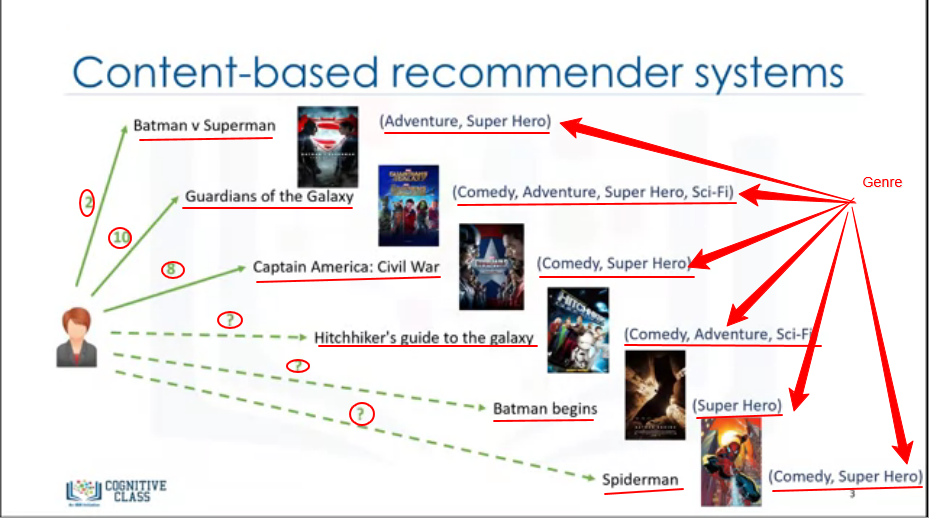

* First, we create a ***vector of user's ratings*** for the movies that they have already watched.<br>
* Then, we encode the movies through the ***one-hot encoding approach***. Genre of movies are used here as a feature set.

In [ ]:
user = data[["userId", "rating", "genres"]].copy()
for index, row in data[["genres"]].iterrows():
    for genre in row['genres']:
        user.at[index, genre] = 1
user = user.fillna(0)

In [ ]:
# drop "genres", "title" columns as they're not going to help us is user profile
user.drop(["genres"], axis=1, inplace=True)
user.head()

,userId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,4.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,2.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,4.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
input_user_ratings = np.array(user[["rating"]])
movie_matrix = user.drop(columns=["rating", "userId"])

* If we multiply **these two matrices** we can get the weighted feature set for the movies. This matrix is also called the Weighted Genre matrix and represents the interests of the user for each genre based on the movies that she's watched. 

In [ ]:
user_profile = input_user_ratings * movie_matrix

* Now, we can shape the profile of our active user. Essentially, we can aggregate the weighted genres and then normalize them to find the user profile. 
It clearly indicates what every user likes . We use this profile to figure out what movie is proper to recommend to this user.

In [ ]:
user_profile.insert(0, "userId", "")
user_profile["userId"] = user["userId"]
user_profile.head()

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,4.5,4.5,4.5,4.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,2.5,2.5,2.5,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,4.5,4.5,4.5,4.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100832,610,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100833,610,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100834,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_profile = user_profile.groupby(by="userId").sum()
users_profile.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
userId,,,,,,,,,,,,,,,,,,,
1,373.0,136.0,191.0,355.0,202.0,112.0,389.0,196.0,228.0,75.0,59.0,308.0,99.0,30.0,169.0,103.0,5.0,0.0,0.0
2,12.5,0.0,0.0,28.0,0.0,4.5,43.5,38.0,37.0,8.0,3.0,66.0,4.5,3.5,15.5,0.0,0.0,15.0,13.0
3,30.0,2.0,2.5,9.0,13.5,2.5,50.0,1.0,29.0,5.0,37.5,12.0,2.5,0.0,63.0,0.5,0.0,0.0,0.0
4,106.0,24.0,38.0,365.0,70.0,196.0,83.0,103.0,135.0,80.0,17.0,418.0,25.0,38.0,34.0,64.0,16.0,3.0,8.0
5,26.0,26.0,37.0,52.0,29.0,34.0,28.0,46.0,32.0,4.0,3.0,95.0,10.0,6.0,5.0,22.0,0.0,11.0,0.0


In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
# transform data
scaled = pd.DataFrame(scaler.fit_transform(users_profile), index=users_profile.index, columns=users_profile.columns)
scaled= round(scaled, 3)
scaled.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
userId,,,,,,,,,,,,,,,,,,,
1,0.425,0.155,0.218,0.405,0.230,0.128,0.444,0.223,0.260,0.086,0.067,0.351,0.113,0.034,0.193,0.117,0.006,0.000,0.000
2,0.120,0.000,0.000,0.270,0.000,0.043,0.419,0.366,0.357,0.077,0.029,0.636,0.043,0.034,0.149,0.000,0.000,0.145,0.125
3,0.299,0.020,0.025,0.090,0.135,0.025,0.498,0.010,0.289,0.050,0.374,0.120,0.025,0.000,0.628,0.005,0.000,0.000,0.000
4,0.165,0.037,0.059,0.567,0.109,0.304,0.129,0.160,0.210,0.124,0.026,0.649,0.039,0.059,0.053,0.099,0.025,0.005,0.012
5,0.179,0.179,0.254,0.357,0.199,0.234,0.192,0.316,0.220,0.027,0.021,0.653,0.069,0.041,0.034,0.151,0.000,0.076,0.000


To choose one movie of the candidate movies to be recommended to the user.
* simply multiply the User ***Profile matrix*** by the ***candidate Movie Matrix***, which results in the Weighted Movies Matrix. It shows the weight of each genre with respect to the User Profile.
* aggregate these weighted ratings, we get the user's possible interest level in these three movies.

###<u>***Collaborative filtering recomendation system***</u>.
Collaborative filtering is based on the fact that <u>relationships exist between products and people's interests</u>. Many recommendation systems use collaborative filtering to find these relationships and to give an accurate recommendation of a product that the user might like or be interested in.
Collaborative filtering has basically two approaches:

*   <u>***user-based collaborative filtering***</u> is based on the user similarity or neighborhood.
*   <u>***item-based collaborative filtering***</u> is based on similarity among items.

<u>***user-based collaborative filtering***</u>: 
The collaborative filtering engine first looks for users who are similar. this similarity is based on things like history, preference, and choices that users make when buying, watching, or enjoying something.<u>For instance</u>, if two users are similar or are neighbors, we can recommend a movie to the active user that is neighbor has already seen.

<u>**Item-based collaborative filtering**</u>: Similar items build neighborhoods on the behavior of users. it is not based on their contents.<u>For instance</u>, **Item1** and **Item3** are considered neighbors as they were positively rated by both **User1** and **User2**. So, **Item1** can be recommended to **User3** as he has already shown interest in **Item3**. Therefore, the recommendations here are based on the items in the neighborhood that a user might prefer. 
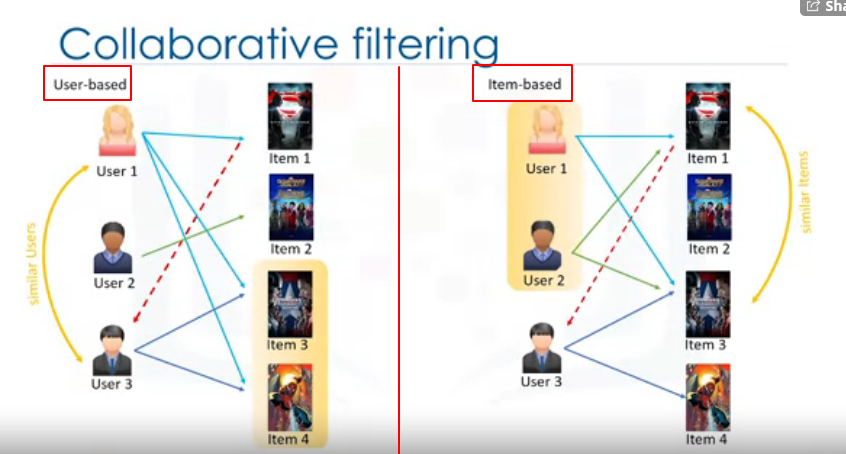



***For size reasons***, We'll take a small slice from our dataset ***-1100 records-***.

In [ ]:
data_slice = data[0:1100]

In [ ]:
user_ratings_table = data_slice.pivot_table(index='userId', columns="title", values="rating")
# Inspect the transformed table
user_ratings_table.head()

title,Bottle Rocket,Braveheart,From Dusk Till Dawn,Grumpier Old Men,Heat,Rob Roy,Seven (a.k.a. Se7en),Toy Story,"Usual Suspects, The"
userId,,,,,,,,,
1,5.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0
6,NaN,5.0,NaN,5.0,4.0,4.0,4.0,NaN,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,4.5


As we can observe, There's a lot of NaN in our table.<br>**Note herer**, **NaN** does not refer to **missingness in data** these time, But it means that **the user haven't watched or rated those movies yet**.this's one of the obstacles of **coloborative filtering** that's called **data sparsity**.<br>Our turn here is to predict the **rate** that the user would give to specific movies based on the **users similarity**.

####<u> ***How do we determine the rating that a user would give to an item ?***</u><br>

*    <u>User-based:</u> For a user ***U***, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an ***itemI***, which hasn’t been rated, is found by picking out ***N users*** from the similarity list who have rated the ***itemI*** and calculating the rating based on these ***N ratings***.

*    <u>Item-based:</u> For an **itemI**, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user **U**, who hasn’t rated it, is found by picking out **N items** from the similarity list that have been rated by **U** and calculating the rating based on these **N ratings**.
